In [1]:
# Loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset 

df = pd.read_excel('chest pain.xlsx')
print(df.shape)
df.head()

(1002, 41)


,Survey,Race,Ethnicity,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP Both Arms,CP radiate neck/throat,...,Trop High,Disposition,Dx,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI,Event CABG,Event Death,Info determined by:
0,1,White,"Not Hispanic , Latino/a or Spanish origin",2.0,7,False,False,False,False,False,...,No,Admit,Chest Pain (non-specific),No,No,False,False,False,False,Direct Contact with Pt or Family
1,2,Black or African American,Hispanic or Latino,21.0,3,False,False,False,False,False,...,No,Admit,Chest Pain (non-specific),No,No,False,False,False,False,Direct Contact with Pt or Family
2,4,Native Hawaiin or Other Pacific Islander,"Not Hispanic , Latino/a or Spanish origin",360.0,5,False,False,False,False,False,...,No,Admit,GERD,No,No,False,False,False,False,Medical Record review
3,5,Black or African American,"Not Hispanic , Latino/a or Spanish origin",2880.0,8,False,False,False,False,False,...,No,discharge,Abdominal Pain,No,No,False,False,False,False,Medical Record review
4,6,White,Hispanic or Latino,2280.0,2,False,False,False,False,False,...,No,Admit,Chest Pain (non-specific),No,No,False,False,False,False,Medical Record review


In [3]:
print(df.columns)

Index(['Survey', 'Race', 'Ethnicity', 'Length min', 'How bad was CP?  0-10',
       'CP radiate Back?', 'CP radiate L Shoulder/Arm',
       'CP radiate R shoulder/arm', 'CP Both Arms', 'CP radiate neck/throat',
       'CP radiate Face', 'CP radiate Abd', 'Nausea', ' Vomiting', 'Sweating',
       'Lightheadedness', 'Cough', 'Quality CP Pressure',
       'Quality CP Tightness', 'Quality CP Ripping/Tearing',
       'Quality CP Sharp/stabbing', 'Quality CP Pins/Needles', 'Other Quality',
       'Having heart attack?', 'Compare No Previous MI',
       'Compare Similar previous', 'Compare similar worse',
       'Compare different', 'Worse w/ activity?', 'Age', 'Gender', 'Trop High',
       'Disposition', 'Dx', 'Acute MI', ' Major Cardiac Event 6 wks',
       'Event MI', 'Event PCI', 'Event CABG', 'Event Death',
       'Info determined by:'],
      dtype='object')


# Data Pre-processing

In [4]:
drop_colmn=['Survey', 'Ethnicity','Other Quality','Info determined by:','Disposition','Dx','Event CABG', 'Event Death']
df.drop(columns=drop_colmn,inplace=True)
print(df.shape)

(1002, 33)


In [5]:
# Checking for null values

df.isnull().sum()

Race                            0
Length min                     14
How bad was CP?  0-10           0
CP radiate Back?                0
CP radiate L Shoulder/Arm       0
CP radiate R shoulder/arm       0
CP Both Arms                    0
CP radiate neck/throat          0
CP radiate Face                 0
CP radiate Abd                  0
Nausea                          0
 Vomiting                       0
Sweating                        0
Lightheadedness                 0
Cough                           0
Quality CP Pressure             0
Quality CP Tightness            0
Quality CP Ripping/Tearing      0
Quality CP Sharp/stabbing       0
Quality CP Pins/Needles         0
Having heart attack?            2
Compare No Previous MI          0
Compare Similar previous        0
Compare similar worse           0
Compare different               0
Worse w/ activity?              0
Age                             0
Gender                          0
Trop High                      22
Acute MI      

In [6]:
# Removing null columns entries if any
df.dropna(inplace=True)
print(df.shape)


(806, 33)


In [7]:
df.head()

,Race,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP Both Arms,CP radiate neck/throat,CP radiate Face,CP radiate Abd,...,Compare similar worse,Compare different,Worse w/ activity?,Age,Gender,Trop High,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI
0,White,2.0,7,False,False,False,False,False,False,False,...,False,False,False,65,Female,No,No,No,False,False
1,Black or African American,21.0,3,False,False,False,False,False,False,False,...,False,False,False,51,Male,No,No,No,False,False
2,Native Hawaiin or Other Pacific Islander,360.0,5,False,False,False,False,False,False,False,...,True,False,False,43,Male,No,No,No,False,False
3,Black or African American,2880.0,8,False,False,False,False,False,False,True,...,False,False,True,43,Male,No,No,No,False,False
4,White,2280.0,2,False,False,False,False,False,False,False,...,False,False,False,59,Male,No,No,No,False,False


In [8]:
# df.duplicated().sum()


In [9]:
# drop duplicates value
df.drop_duplicates(inplace = True)
print(df.shape)

(806, 33)


In [10]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  Race  has  6  unique values ---->  ['White' 'Black or African American'
 'Native Hawaiin or Other Pacific Islander' 'Asian' 'Other'
 'American Indian or Alska Native']
Feature  Length min  has  98  unique values
Feature  How bad was CP?  0-10  has  11  unique values
Feature  CP radiate Back?  has  2  unique values ---->  [False  True]
Feature  CP radiate L Shoulder/Arm  has  2  unique values ---->  [False  True]
Feature  CP radiate R shoulder/arm  has  2  unique values ---->  [False  True]
Feature  CP Both Arms  has  2  unique values ---->  [False  True]
Feature  CP radiate neck/throat  has  2  unique values ---->  [False  True]
Feature  CP radiate Face  has  2  unique values ---->  [False  True]
Feature  CP radiate Abd  has  2  unique values ---->  [False  True]
Feature  Nausea  has  2  unique values ---->  [ True False]
Feature   Vomiting  has  2  unique values ---->  [False  True]
Feature  Sweating  has  2  unique values ---->  [False  True]
Feature  Lightheadedness  has  2

In [11]:
df['Event PCI'].value_counts()

False    769
True      37
Name: Event PCI, dtype: int64

In [12]:
df.columns

Index(['Race', 'Length min', 'How bad was CP?  0-10', 'CP radiate Back?',
       'CP radiate L Shoulder/Arm', 'CP radiate R shoulder/arm',
       'CP Both Arms', 'CP radiate neck/throat', 'CP radiate Face',
       'CP radiate Abd', 'Nausea', ' Vomiting', 'Sweating', 'Lightheadedness',
       'Cough', 'Quality CP Pressure', 'Quality CP Tightness',
       'Quality CP Ripping/Tearing', 'Quality CP Sharp/stabbing',
       'Quality CP Pins/Needles', 'Having heart attack?',
       'Compare No Previous MI', 'Compare Similar previous',
       'Compare similar worse', 'Compare different', 'Worse w/ activity?',
       'Age', 'Gender', 'Trop High', 'Acute MI', ' Major Cardiac Event 6 wks',
       'Event MI', 'Event PCI'],
      dtype='object')

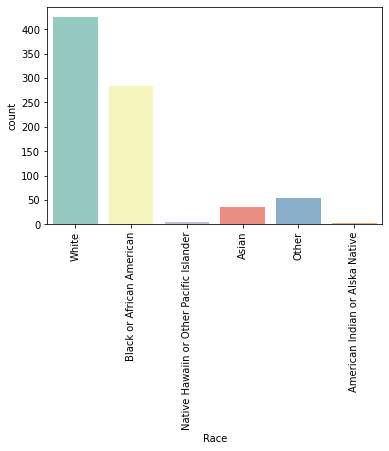

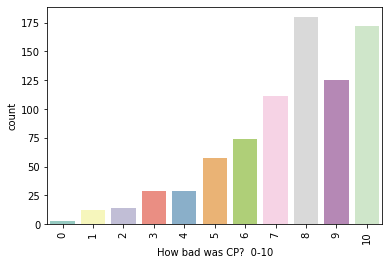

In [13]:
# Looping through all the categorical features by our y variable - see if there is relationship
features = ['Race', 'How bad was CP?  0-10']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=90)
    plt.show()

In [14]:
df['Race'].value_counts()

White                                       425
Black or African American                   283
Other                                        55
Asian                                        36
Native Hawaiin or Other Pacific Islander      4
American Indian or Alska Native               3
Name: Race, dtype: int64

In [15]:
df.index[df[ 'Race']=='American Indian or Alska Native'].tolist()


[137, 437, 897]

In [16]:
df.drop(index=[137,437,897],inplace=True)

In [17]:
df['Race'].value_counts()

White                                       425
Black or African American                   283
Other                                        55
Asian                                        36
Native Hawaiin or Other Pacific Islander      4
Name: Race, dtype: int64

In [18]:
df.index[df[ 'Race']=='Native Hawaiin or Other Pacific Islander'].tolist()

[2, 391, 605, 805]

In [19]:
df.drop(index=[2,391,605,805],inplace=True)

In [20]:
df['Race'].value_counts()

White                        425
Black or African American    283
Other                         55
Asian                         36
Name: Race, dtype: int64

In [21]:
df['Event PCI'].value_counts()

False    762
True      37
Name: Event PCI, dtype: int64

In [22]:
df['How bad was CP?  0-10'].value_counts()

8     179
10    170
9     125
7     110
6      73
5      56
3      29
4      29
2      13
1      12
0       3
Name: How bad was CP?  0-10, dtype: int64

In [23]:
df.head()

,Race,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP Both Arms,CP radiate neck/throat,CP radiate Face,CP radiate Abd,...,Compare similar worse,Compare different,Worse w/ activity?,Age,Gender,Trop High,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI
0,White,2.0,7,False,False,False,False,False,False,False,...,False,False,False,65,Female,No,No,No,False,False
1,Black or African American,21.0,3,False,False,False,False,False,False,False,...,False,False,False,51,Male,No,No,No,False,False
3,Black or African American,2880.0,8,False,False,False,False,False,False,True,...,False,False,True,43,Male,No,No,No,False,False
4,White,2280.0,2,False,False,False,False,False,False,False,...,False,False,False,59,Male,No,No,No,False,False
5,White,1440.0,8,False,True,True,True,False,False,False,...,False,False,False,58,Male,No,No,No,False,False


In [24]:
df.index[df[ 'How bad was CP?  0-10']==0].tolist()

[81, 699, 989]

In [25]:
df.drop(index=[81,699,989],inplace=True)

In [26]:
df['How bad was CP?  0-10'].value_counts()

8     179
10    170
9     125
7     110
6      73
5      56
3      29
4      29
2      13
1      12
Name: How bad was CP?  0-10, dtype: int64

In [27]:
print(df.shape)

(796, 33)


In [28]:
df['Event PCI'].value_counts()

False    759
True      37
Name: Event PCI, dtype: int64

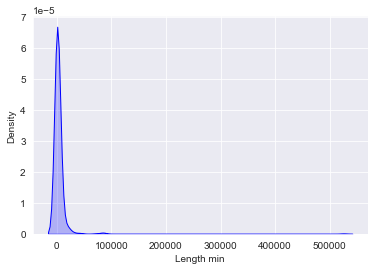

In [191]:
#Let's make the KDE plot for horsepower
sns.kdeplot(x = 'Length min', data = df, color = 'blue', vertical = False,shade = True);


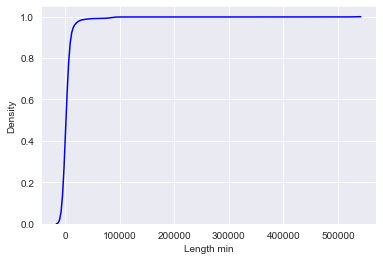

In [192]:
#Let's make the KDE plot for horsepower
sns.kdeplot(x = 'Length min', data = df,color = 'blue',cumulative = True);

In [31]:
print(df.shape)
df.head()

(796, 33)


,Race,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP Both Arms,CP radiate neck/throat,CP radiate Face,CP radiate Abd,...,Compare similar worse,Compare different,Worse w/ activity?,Age,Gender,Trop High,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI
0,White,2.0,7,False,False,False,False,False,False,False,...,False,False,False,65,Female,No,No,No,False,False
1,Black or African American,21.0,3,False,False,False,False,False,False,False,...,False,False,False,51,Male,No,No,No,False,False
3,Black or African American,2880.0,8,False,False,False,False,False,False,True,...,False,False,True,43,Male,No,No,No,False,False
4,White,2280.0,2,False,False,False,False,False,False,False,...,False,False,False,59,Male,No,No,No,False,False
5,White,1440.0,8,False,True,True,True,False,False,False,...,False,False,False,58,Male,No,No,No,False,False


# Histogram

In [32]:
df.columns


Index(['Race', 'Length min', 'How bad was CP?  0-10', 'CP radiate Back?',
       'CP radiate L Shoulder/Arm', 'CP radiate R shoulder/arm',
       'CP Both Arms', 'CP radiate neck/throat', 'CP radiate Face',
       'CP radiate Abd', 'Nausea', ' Vomiting', 'Sweating', 'Lightheadedness',
       'Cough', 'Quality CP Pressure', 'Quality CP Tightness',
       'Quality CP Ripping/Tearing', 'Quality CP Sharp/stabbing',
       'Quality CP Pins/Needles', 'Having heart attack?',
       'Compare No Previous MI', 'Compare Similar previous',
       'Compare similar worse', 'Compare different', 'Worse w/ activity?',
       'Age', 'Gender', 'Trop High', 'Acute MI', ' Major Cardiac Event 6 wks',
       'Event MI', 'Event PCI'],
      dtype='object')

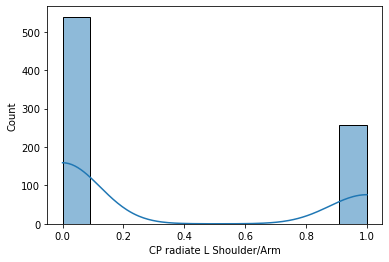

In [33]:
sns.histplot(x = 'CP radiate L Shoulder/Arm',kde= True,data = df);

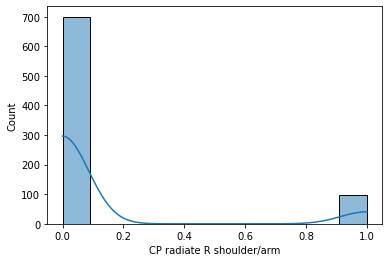

In [34]:
sns.histplot(x = 'CP radiate R shoulder/arm',kde= True,data = df);

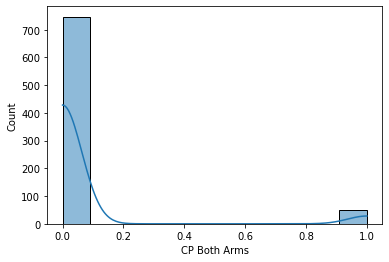

In [35]:
sns.histplot(x = 'CP Both Arms',kde= True,data = df);

In [36]:
df['CP Both Arms'].value_counts()

False    747
True      49
Name: CP Both Arms, dtype: int64

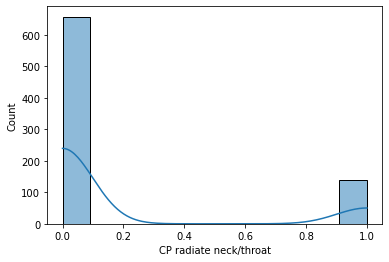

In [37]:
sns.histplot(x = 'CP radiate neck/throat',kde= True,data = df);

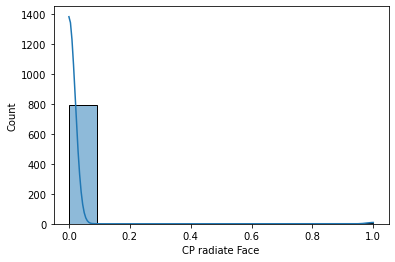

In [38]:
sns.histplot(x = 'CP radiate Face',kde= True,data = df);

In [39]:
df['CP radiate Face'].value_counts()

False    791
True       5
Name: CP radiate Face, dtype: int64

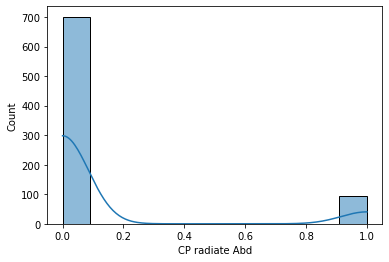

In [40]:
sns.histplot(x = 'CP radiate Abd',kde= True,data = df);

In [41]:
df['CP radiate Abd'].value_counts()

False    701
True      95
Name: CP radiate Abd, dtype: int64

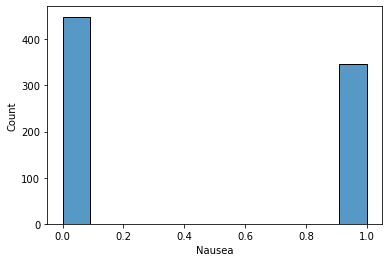

In [42]:
sns.histplot(x = 'Nausea',kde= False,data = df);

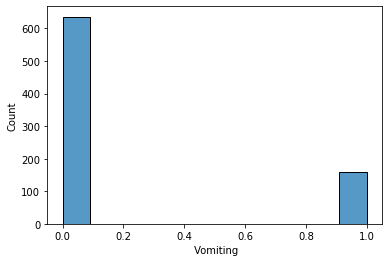

In [43]:
sns.histplot(x = ' Vomiting',kde= False,data = df);

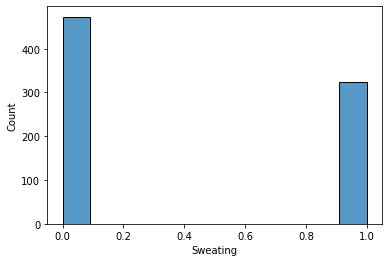

In [44]:
sns.histplot(x = 'Sweating',kde= False,data = df);

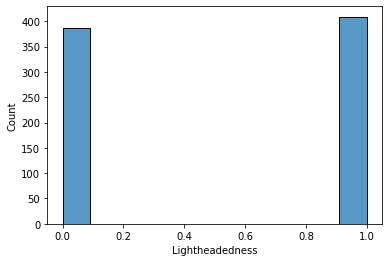

In [45]:
sns.histplot(x = 'Lightheadedness',kde= False,data = df);

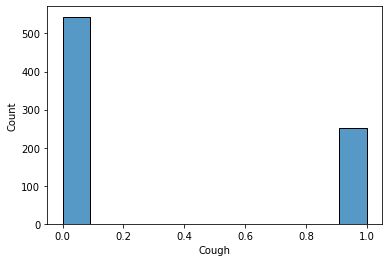

In [46]:
sns.histplot(x = 'Cough',kde= False,data = df);

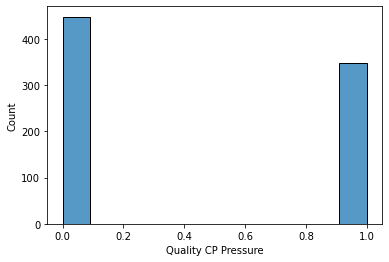

In [47]:
sns.histplot(x = 'Quality CP Pressure',kde= False,data = df);

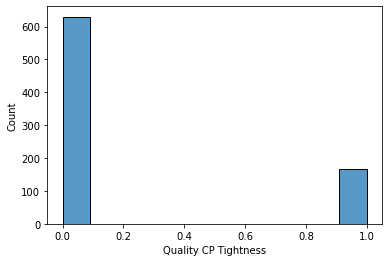

In [48]:
sns.histplot(x = 'Quality CP Tightness',kde= False,data = df);

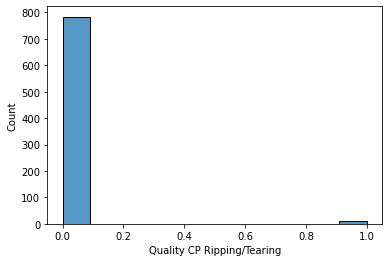

In [49]:
sns.histplot(x = 'Quality CP Ripping/Tearing',kde= False,data = df);

In [50]:
df['Quality CP Ripping/Tearing'].value_counts()

False    784
True      12
Name: Quality CP Ripping/Tearing, dtype: int64

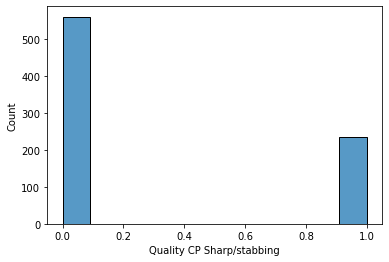

In [51]:
sns.histplot(x =  'Quality CP Sharp/stabbing',kde= False,data = df);

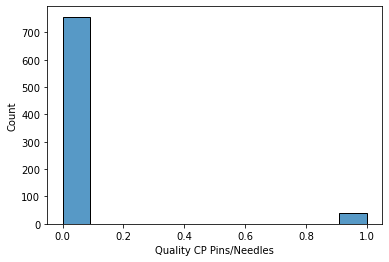

In [52]:
sns.histplot(x = 'Quality CP Pins/Needles',kde= False,data = df);

In [53]:
df['Quality CP Pins/Needles'].value_counts()

False    757
True      39
Name: Quality CP Pins/Needles, dtype: int64

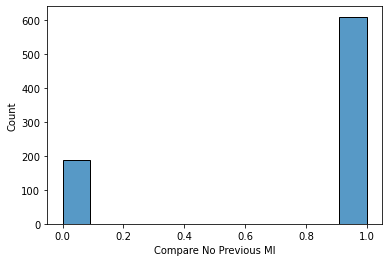

In [54]:
sns.histplot(x = 'Compare No Previous MI',kde= False,data = df);

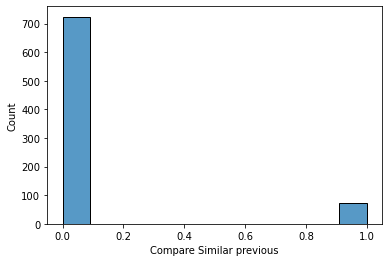

In [55]:
sns.histplot(x = 'Compare Similar previous',kde= False,data = df);

In [56]:
df['Compare Similar previous'].value_counts()

False    724
True      72
Name: Compare Similar previous, dtype: int64

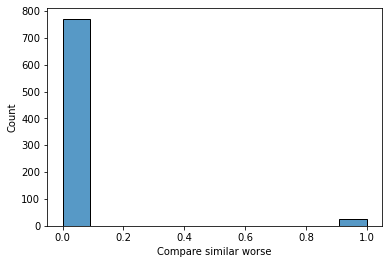

In [57]:
sns.histplot(x = 'Compare similar worse',kde= False,data = df);

In [58]:
df['Compare similar worse'].value_counts()

False    771
True      25
Name: Compare similar worse, dtype: int64

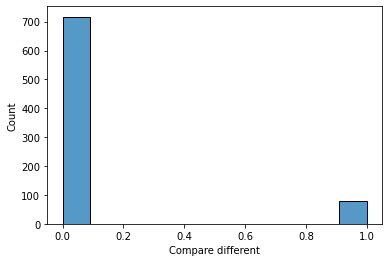

In [59]:
sns.histplot(x = 'Compare different',kde= False,data = df);

In [60]:
df['Compare different'].value_counts()

False    717
True      79
Name: Compare different, dtype: int64

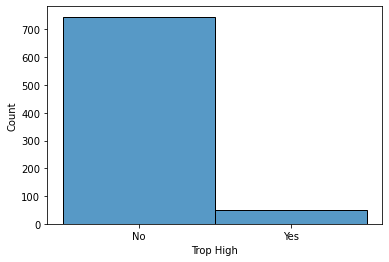

In [61]:
sns.histplot(x = 'Trop High',kde= False,data = df);

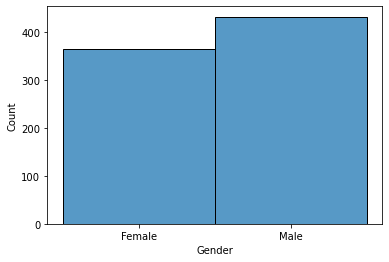

In [62]:
sns.histplot(x = 'Gender',kde= False,data = df);

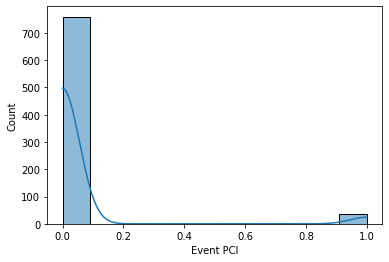

In [63]:
sns.histplot(x = 'Event PCI',kde= True,data = df);

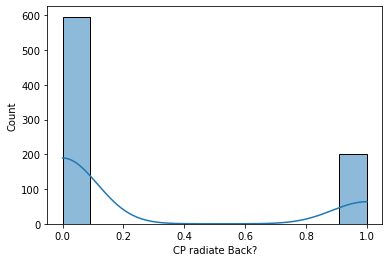

In [64]:
sns.histplot(x = 'CP radiate Back?',kde= True,data = df);

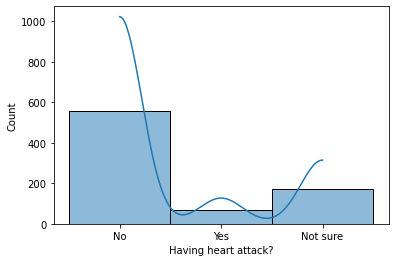

In [65]:
sns.histplot(x = 'Having heart attack?',kde= True,data = df);

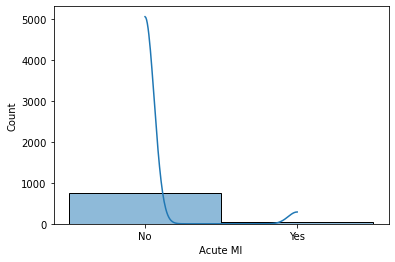

In [66]:
sns.histplot(x = 'Acute MI',kde= True,data = df);

In [67]:
df[ 'Acute MI'].value_counts()

No     753
Yes     43
Name: Acute MI, dtype: int64

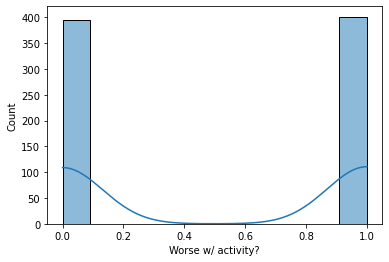

In [68]:
sns.histplot(x = 'Worse w/ activity?',kde= True,data = df);

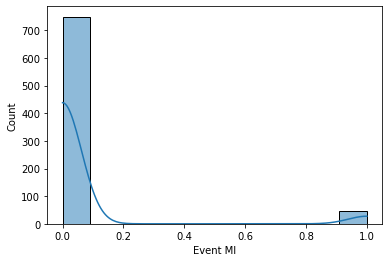

In [69]:
sns.histplot(x = 'Event MI',kde= True,data = df);

In [70]:
df[ 'Event MI'].value_counts()

False    749
True      47
Name: Event MI, dtype: int64

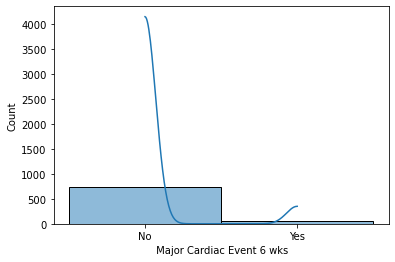

In [71]:
sns.histplot(x = ' Major Cardiac Event 6 wks',kde= True,data = df);

In [72]:
df[ ' Major Cardiac Event 6 wks'].value_counts()

No     734
Yes     62
Name:  Major Cardiac Event 6 wks, dtype: int64

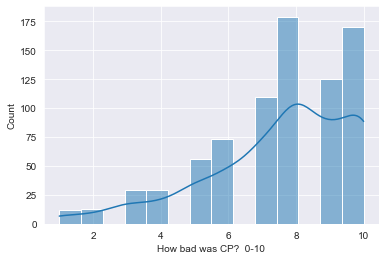

In [73]:
sns.set_style('darkgrid')
sns.histplot(x = 'How bad was CP?  0-10',kde= True, data = df);


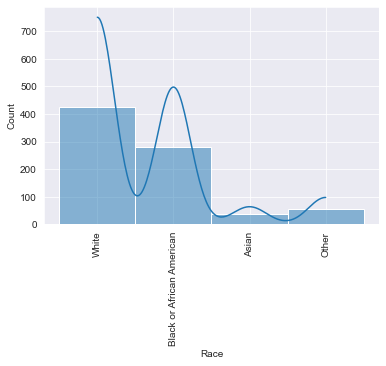

In [74]:
sns.set_style('darkgrid')
sns.histplot(x = 'Race', kde = True,data = df)
plt.xticks(rotation=90)
plt.show()

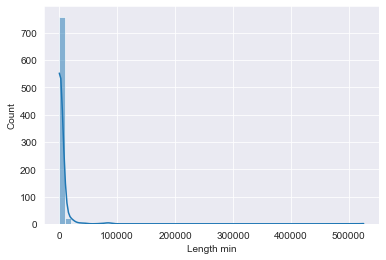

In [75]:
sns.histplot(x = 'Length min', kde = True, bins=50, data = df);

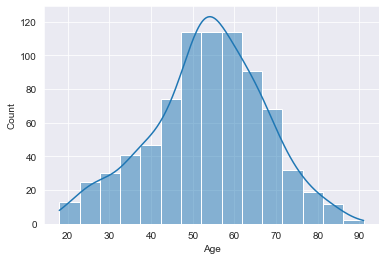

In [76]:
sns.histplot(x = 'Age', kde = True, bins= 15, data = df);

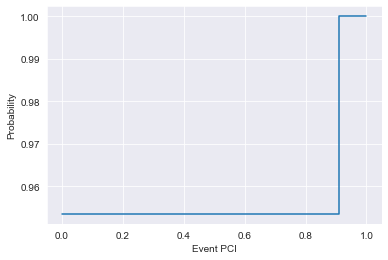

In [77]:
sns.histplot(x = 'Event PCI', data = df, stat = 'probability', fill = False, element = 'step', cumulative = True);

In [78]:
# feature_s=['Race', 'CP radiate Back?',
#        'CP radiate L Shoulder/Arm', 'CP radiate R shoulder/arm',
#        'CP Both Arms', 'CP radiate neck/throat', 'CP radiate Face',
#        'CP radiate Abd', 'Nausea', ' Vomiting', 'Sweating', 'Lightheadedness',
#        'Cough', 'Quality CP Pressure', 'Quality CP Tightness',
#        'Quality CP Ripping/Tearing', 'Quality CP Sharp/stabbing',
#        'Quality CP Pins/Needles', 'Having heart attack?',
#        'Compare No Previous MI', 'Compare Similar previous',
#        'Compare similar worse', 'Compare different', 'Worse w/ activity?',
#        'Gender', 'Trop High', 'Acute MI',
#        ' Major Cardiac Event 6 wks', 'Event MI', 'Event PCI', 'Event CABG',
#        'Event Death']
# df = pd.get_dummies(data = df, columns = feature_s)
# df.head(10)

In [79]:
#Because of very low positive value compared to negative
drop_colmn=['CP radiate Face', 'Quality CP Ripping/Tearing','Compare similar worse','CP Both Arms']
df.drop(columns=drop_colmn,inplace=True)
print(df.shape)

(796, 29)


In [80]:
df['Event PCI'].value_counts()

False    759
True      37
Name: Event PCI, dtype: int64

In [81]:
df.head()

,Race,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP radiate neck/throat,CP radiate Abd,Nausea,Vomiting,...,Compare Similar previous,Compare different,Worse w/ activity?,Age,Gender,Trop High,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI
0,White,2.0,7,False,False,False,False,False,True,False,...,False,False,False,65,Female,No,No,No,False,False
1,Black or African American,21.0,3,False,False,False,False,False,False,False,...,False,False,False,51,Male,No,No,No,False,False
3,Black or African American,2880.0,8,False,False,False,False,True,True,False,...,False,False,True,43,Male,No,No,No,False,False
4,White,2280.0,2,False,False,False,False,False,False,False,...,False,False,False,59,Male,No,No,No,False,False
5,White,1440.0,8,False,True,True,False,False,False,False,...,False,False,False,58,Male,No,No,No,False,False


In [82]:
df.columns

Index(['Race', 'Length min', 'How bad was CP?  0-10', 'CP radiate Back?',
       'CP radiate L Shoulder/Arm', 'CP radiate R shoulder/arm',
       'CP radiate neck/throat', 'CP radiate Abd', 'Nausea', ' Vomiting',
       'Sweating', 'Lightheadedness', 'Cough', 'Quality CP Pressure',
       'Quality CP Tightness', 'Quality CP Sharp/stabbing',
       'Quality CP Pins/Needles', 'Having heart attack?',
       'Compare No Previous MI', 'Compare Similar previous',
       'Compare different', 'Worse w/ activity?', 'Age', 'Gender', 'Trop High',
       'Acute MI', ' Major Cardiac Event 6 wks', 'Event MI', 'Event PCI'],
      dtype='object')

In [83]:
cat_features = ['Race', 'How bad was CP?  0-10','CP radiate Back?',
       'CP radiate L Shoulder/Arm', 'CP radiate R shoulder/arm',
       'CP radiate neck/throat','CP radiate Abd', 'Nausea', ' Vomiting', 'Sweating', 'Lightheadedness',
       'Cough', 'Quality CP Pressure', 'Quality CP Tightness', 'Quality CP Sharp/stabbing',
       'Quality CP Pins/Needles', 'Having heart attack?',
       'Compare No Previous MI', 'Compare Similar previous','Compare different', 'Worse w/ activity?',
       'Gender', 'Trop High', 'Acute MI', ' Major Cardiac Event 6 wks',
       'Event MI']

In [84]:
df[ 'Race'].value_counts()

White                        424
Black or African American    281
Other                         55
Asian                         36
Name: Race, dtype: int64

In [85]:
# Convert Catergorical values to numeric representation
# ['White' 'Black or African American'
#  'Native Hawaiin or Other Pacific Islander' 'Asian' 'Other'
#  'American Indian or Alska Native']
df['Race'].replace({'White':'A',  'Black or African American':'B','Other':'C','Asian':'D'}, inplace = True)
df['Having heart attack?'].replace({'No':"P", 'Yes':"Q", 'Not sure':"R"}, inplace = True)
df.head(10)

,Race,Length min,How bad was CP? 0-10,CP radiate Back?,CP radiate L Shoulder/Arm,CP radiate R shoulder/arm,CP radiate neck/throat,CP radiate Abd,Nausea,Vomiting,...,Compare Similar previous,Compare different,Worse w/ activity?,Age,Gender,Trop High,Acute MI,Major Cardiac Event 6 wks,Event MI,Event PCI
0,A,2.0,7,False,False,False,False,False,True,False,...,False,False,False,65,Female,No,No,No,False,False
1,B,21.0,3,False,False,False,False,False,False,False,...,False,False,False,51,Male,No,No,No,False,False
3,B,2880.0,8,False,False,False,False,True,True,False,...,False,False,True,43,Male,No,No,No,False,False
4,A,2280.0,2,False,False,False,False,False,False,False,...,False,False,False,59,Male,No,No,No,False,False
5,A,1440.0,8,False,True,True,False,False,False,False,...,False,False,False,58,Male,No,No,No,False,False
6,A,10080.0,9,True,False,False,False,False,False,False,...,False,False,False,65,Female,No,No,No,False,False
7,B,60.0,9,True,False,False,False,False,True,True,...,False,False,True,47,Male,No,No,No,False,False
10,B,4320.0,10,False,True,False,False,False,True,False,...,False,False,True,58,Female,No,No,No,False,False
11,A,20160.0,10,True,False,False,False,False,True,False,...,False,False,True,45,Female,No,No,No,False,False
14,B,10080.0,9,False,True,False,False,False,True,True,...,False,False,True,66,Female,No,No,No,False,False


In [86]:
df = pd.get_dummies(data = df, columns = cat_features )
df.head()

,Length min,Age,Event PCI,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
0,2.0,65,False,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,21.0,51,False,0,1,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
3,2880.0,43,False,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,2280.0,59,False,1,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
5,1440.0,58,False,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [87]:
print(df.shape)
df.columns

(796, 66)


Index(['Length min', 'Age', 'Event PCI', 'Race_A', 'Race_B', 'Race_C',
       'Race_D', 'How bad was CP?  0-10_1', 'How bad was CP?  0-10_2',
       'How bad was CP?  0-10_3', 'How bad was CP?  0-10_4',
       'How bad was CP?  0-10_5', 'How bad was CP?  0-10_6',
       'How bad was CP?  0-10_7', 'How bad was CP?  0-10_8',
       'How bad was CP?  0-10_9', 'How bad was CP?  0-10_10',
       'CP radiate Back?_False', 'CP radiate Back?_True',
       'CP radiate L Shoulder/Arm_False', 'CP radiate L Shoulder/Arm_True',
       'CP radiate R shoulder/arm_False', 'CP radiate R shoulder/arm_True',
       'CP radiate neck/throat_False', 'CP radiate neck/throat_True',
       'CP radiate Abd_False', 'CP radiate Abd_True', 'Nausea_False',
       'Nausea_True', ' Vomiting_False', ' Vomiting_True', 'Sweating_False',
       'Sweating_True', 'Lightheadedness_False', 'Lightheadedness_True',
       'Cough_False', 'Cough_True', 'Quality CP Pressure_False',
       'Quality CP Pressure_True', 'Quality CP T

# Feature Scaling

In [88]:
df.describe()

,Length min,Age,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,How bad was CP? 0-10_4,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,3283.528183,53.577889,0.532663,0.353015,0.069095,0.045226,0.015075,0.016332,0.036432,0.036432,...,0.457286,0.542714,0.937186,0.062814,0.945980,0.054020,0.922111,0.077889,0.940955,0.059045
std,20377.789122,13.711409,0.499246,0.478208,0.253776,0.207930,0.121929,0.126827,0.187481,0.187481,...,0.498485,0.498485,0.242781,0.242781,0.226199,0.226199,0.268166,0.268166,0.235858,0.235858
min,0.016670,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,255.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1440.000000,63.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,525600.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
X = df.drop(columns = 'Event PCI') # X contains the features 
y= df['Event PCI']
print(X.shape)
X.head()

(796, 65)


,Length min,Age,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,How bad was CP? 0-10_4,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
0,2.0,65,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,21.0,51,0,1,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,2880.0,43,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
4,2280.0,59,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5,1440.0,58,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [90]:
X.describe()

,Length min,Age,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,How bad was CP? 0-10_4,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,3283.528183,53.577889,0.532663,0.353015,0.069095,0.045226,0.015075,0.016332,0.036432,0.036432,...,0.457286,0.542714,0.937186,0.062814,0.945980,0.054020,0.922111,0.077889,0.940955,0.059045
std,20377.789122,13.711409,0.499246,0.478208,0.253776,0.207930,0.121929,0.126827,0.187481,0.187481,...,0.498485,0.498485,0.242781,0.242781,0.226199,0.226199,0.268166,0.268166,0.235858,0.235858
min,0.016670,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,255.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1440.000000,63.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,525600.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['Length min', 'Age']

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(636, 65)
(160, 65)


In [93]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [94]:
X_test.head()

,Length min,Age,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,How bad was CP? 0-10_4,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
334,0.001389,0.328767,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
635,0.003472,0.904110,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
438,0.004166,0.246575,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
79,0.116666,0.561644,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
862,0.000058,0.383562,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


# Feature Selection

In [95]:
X_train.head()

,Length min,Age,Race_A,Race_B,Race_C,Race_D,How bad was CP? 0-10_1,How bad was CP? 0-10_2,How bad was CP? 0-10_3,How bad was CP? 0-10_4,...,Gender_Female,Gender_Male,Trop High_No,Trop High_Yes,Acute MI_No,Acute MI_Yes,Major Cardiac Event 6 wks_No,Major Cardiac Event 6 wks_Yes,Event MI_False,Event MI_True
218,0.000011,0.356164,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
761,0.003472,0.547945,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
226,0.000694,0.479452,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
74,0.000694,0.589041,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
169,0.000173,0.479452,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [96]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

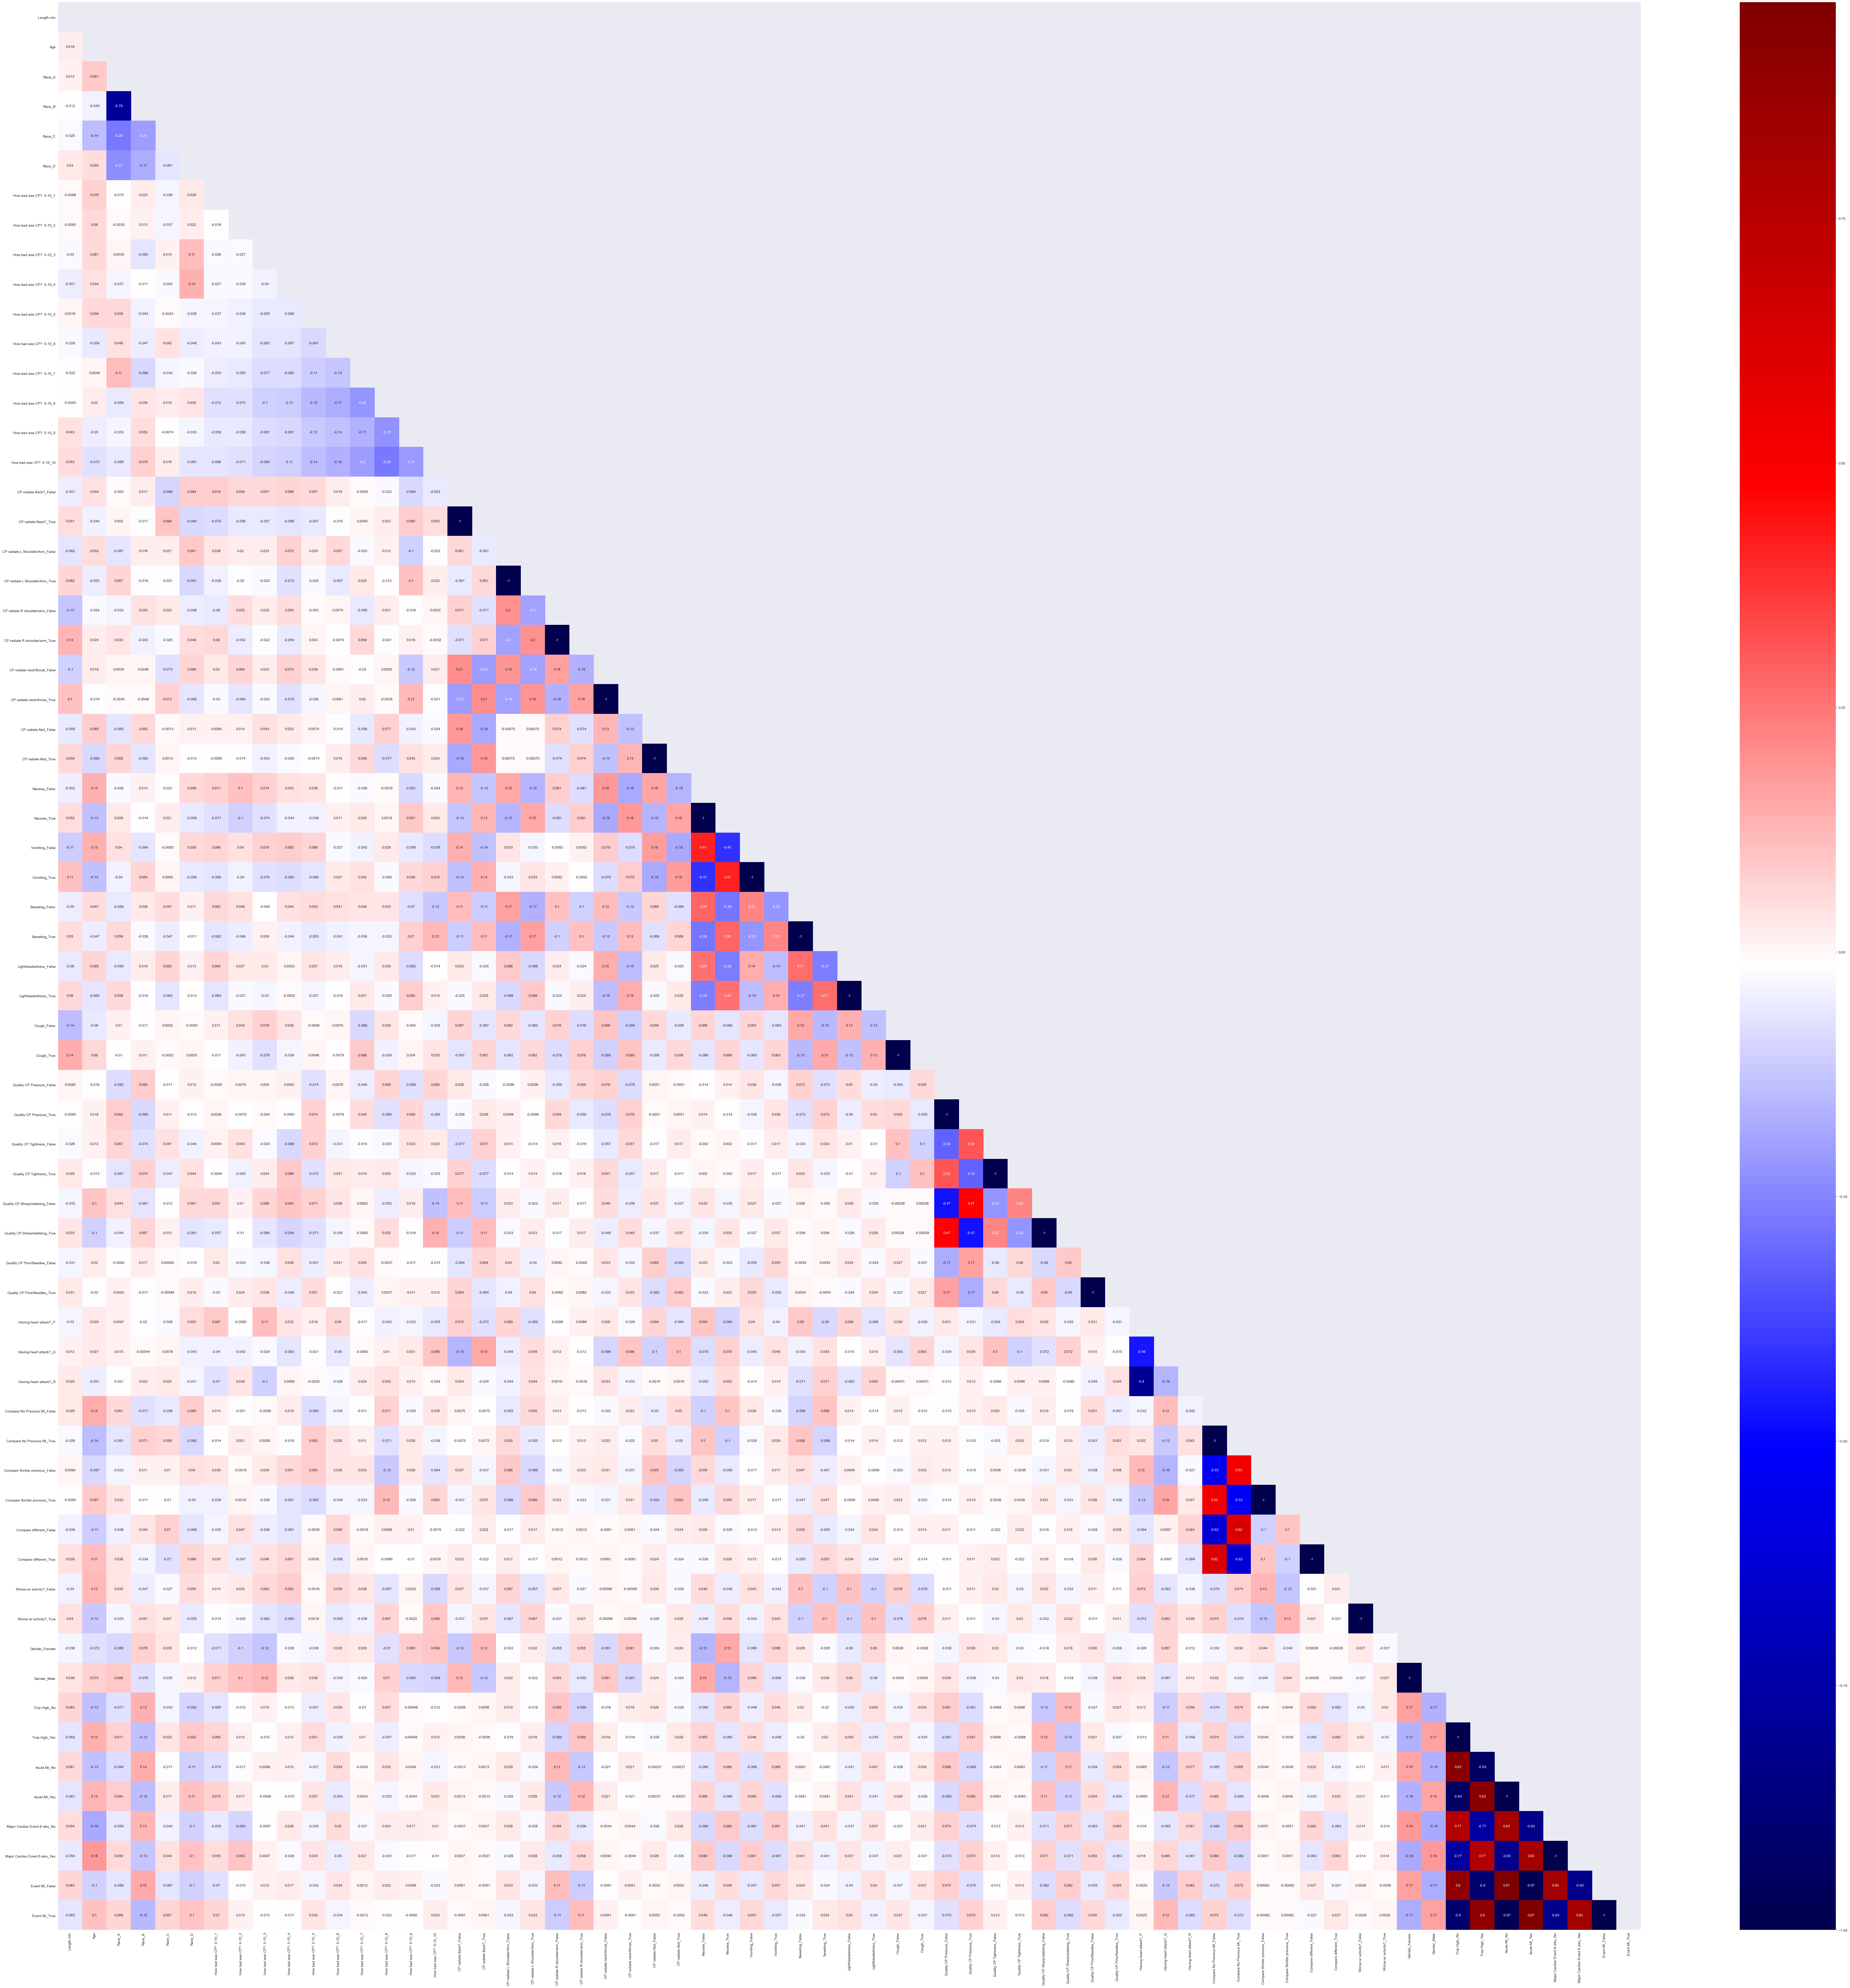

In [97]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (100,100))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [98]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [99]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

25
{'Trop High_Yes', 'Quality CP Pins/Needles_True', 'Compare Similar previous_True', 'Cough_True', ' Major Cardiac Event 6 wks_Yes', 'Acute MI_No', 'CP radiate L Shoulder/Arm_True', 'Lightheadedness_True', 'CP radiate neck/throat_True', 'Acute MI_Yes', 'Compare No Previous MI_True', 'Event MI_True', ' Vomiting_True', 'Gender_Male', 'CP radiate Back?_True', 'Compare different_True', 'Quality CP Tightness_True', 'Worse w/ activity?_True', 'Quality CP Pressure_True', 'Sweating_True', 'CP radiate R shoulder/arm_True', 'Quality CP Sharp/stabbing_True', 'Nausea_True', 'Event MI_False', 'CP radiate Abd_True'}


In [100]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(636, 40)
(160, 40)


# 10 Fold Cross Vlidation

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = DecisionTreeClassifier()

results = cross_val_score(clf, X=X_train, y=y_train, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))



[0.953125   0.953125   0.953125   0.984375   0.90625    0.953125
 0.96825397 0.95238095 0.92063492 0.95238095]

Results =  0.9496775793650795 +/- 0.02083405670040473


# Evaluate Without Using SMOTE 

In [102]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.9559748427672956
Test Accuracy:  0.94375


Depth =  2 , Training Accuracy =  0.9654088050314465 , Test Accuracy =  0.95 , Diff =  1.5408805031446593  %
Depth =  3 , Training Accuracy =  0.9732704402515723 , Test Accuracy =  0.94375 , Diff =  2.95204402515723  %
Depth =  4 , Training Accuracy =  0.9795597484276729 , Test Accuracy =  0.95 , Diff =  2.955974842767295  %
Depth =  5 , Training Accuracy =  0.9889937106918238 , Test Accuracy =  0.95625 , Diff =  3.27437106918238  %
Depth =  6 , Training Accuracy =  0.9968553459119497 , Test Accuracy =  0.94375 , Diff =  5.310534591194971  %
Depth =  7 , Training Accuracy =  1.0 , Test Accuracy =  0.9625 , Diff =  3.749999999999998  %
Depth =  8 , Training Accuracy =  1.0 , Test Accuracy =  0.94375 , Diff =  5.625000000000002  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.95625 , Diff =  4.374999999999996  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.95625 , Diff =  4.374999999999996  %
Depth =  15 , Training Accuracy =  1.0 , Test Accuracy =  0.94375 , 

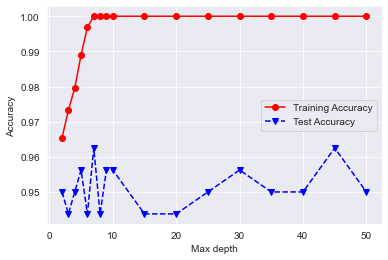

In [103]:
# Decision Tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');
print()
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

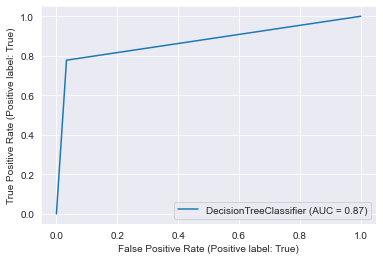

In [104]:
from sklearn.metrics import plot_roc_curve
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.94375 , Difference =  5.625000000000002 %
K =  5 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  10 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  15 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  20 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  25 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  30 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.000         9

    accuracy                          0.944   

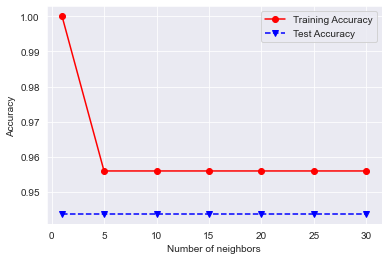

In [105]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');



index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

print()

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

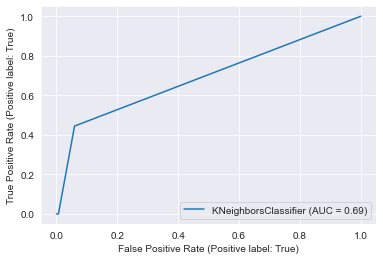

In [106]:
from sklearn.metrics import plot_roc_curve
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.94375 , Difference =  5.625000000000002 %
K =  5 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  10 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  15 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  20 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  25 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %
K =  30 , Training Accuracy =  0.9559748427672956  Test Accuracy =  0.94375 , Difference =  1.222484276729563 %

Confusion Matrix for the Test Case
[[151   0]
 [  9   0]]

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.00

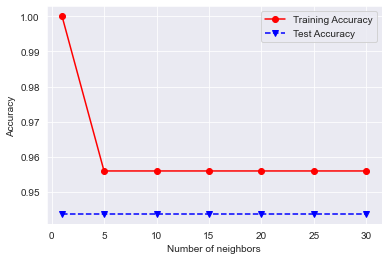

In [107]:
# KNN with Manhattan Distance Metric

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))



plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');


index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

print()
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

In [108]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.9811320754716981
Test Accuracy:  0.95625

Logistic Regression with L2 regularization
Train Accuracy:  0.9779874213836478
Test Accuracy:  0.95625


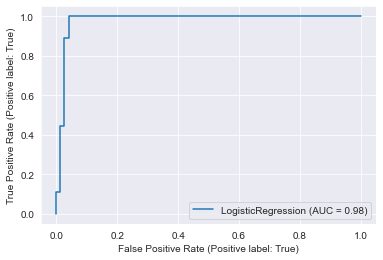

In [109]:
from sklearn.metrics import plot_roc_curve
clf = LogisticRegression()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);

In [110]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.9544025157232704
Test Accuracy:  0.94375

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.000         9

    accuracy                          0.944       160
   macro avg      0.472     0.500     0.486       160
weighted avg      0.891     0.944     0.916       160



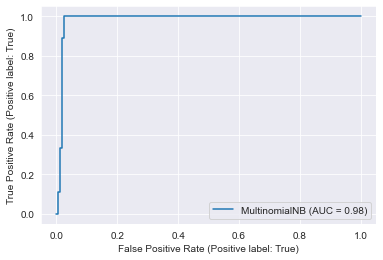

In [111]:
from sklearn.metrics import plot_roc_curve
clf = MultinomialNB()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);

In [112]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.9559748427672956
Test Accuracy:  0.94375

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.000         9

    accuracy                          0.944       160
   macro avg      0.472     0.500     0.486       160
weighted avg      0.891     0.944     0.916       160



In [113]:
# for the SVC classifier
# from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[151   0]
 [  9   0]]

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.000         9

    accuracy                          0.944       160
   macro avg      0.472     0.500     0.486       160
weighted avg      0.891     0.944     0.916       160



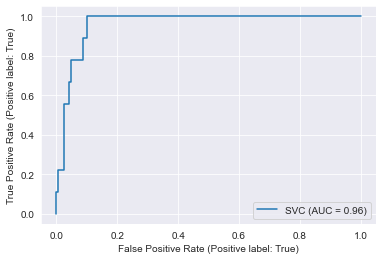

In [114]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 30)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);

# SMOTE - Synthetic Minority Oversampling Technique

In [115]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [116]:
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [117]:
from collections import Counter
print("before SMOTE: ", Counter(y_train))
print("after SMOTE: ", Counter(y_train_SMOTE))


before SMOTE:  Counter({False: 608, True: 28})
after SMOTE:  Counter({False: 608, True: 608})


# 10 Fold Cross validation after using SMOTE

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = DecisionTreeClassifier()

results = cross_val_score(clf, X=X_train_SMOTE, y=y_train_SMOTE, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))





[0.98360656 0.95901639 0.95901639 0.95901639 0.95081967 0.97540984
 1.         1.         0.95041322 1.        ]

Results =  0.9737298469042136 +/- 0.019719870168297404


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = KNeighborsClassifier()

results = cross_val_score(clf, X=X_train_SMOTE, y=y_train_SMOTE, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))





[0.95901639 0.95901639 0.95081967 0.90983607 0.95901639 1.
 1.         1.         1.         1.        ]

Results =  0.9737704918032787 +/- 0.029508196721311487


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = LogisticRegression()

results = cross_val_score(clf, X=X_train_SMOTE, y=y_train_SMOTE, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))





[0.96721311 0.97540984 0.95081967 0.95081967 0.95081967 1.
 1.         1.         1.         1.        ]

Results =  0.9795081967213115 +/- 0.02176380007762585


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = MultinomialNB()

results = cross_val_score(clf, X=X_train_SMOTE, y=y_train_SMOTE, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))





[0.95901639 0.97540984 0.95901639 0.95081967 0.95901639 0.95901639
 0.90909091 0.95867769 0.90909091 0.95041322]

Results =  0.9489567809239938 +/- 0.02093611807035763


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = SVC()

results = cross_val_score(clf, X=X_train_SMOTE, y=y_train_SMOTE, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))





[0.96721311 0.97540984 0.95901639 0.95081967 0.95901639 0.99180328
 1.         1.         1.         1.        ]

Results =  0.9803278688524589 +/- 0.01911787506506658


# Model Creation and Evaluation After SMOTE

In [123]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train_SMOTE))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.5
Test Accuracy:  0.94375


Depth =  2 , Training Accuracy =  0.9712171052631579 , Test Accuracy =  0.96875 , Diff =  0.24671052631578538  %
Depth =  3 , Training Accuracy =  0.977796052631579 , Test Accuracy =  0.95625 , Diff =  2.154605263157894  %
Depth =  4 , Training Accuracy =  0.9851973684210527 , Test Accuracy =  0.975 , Diff =  1.0197368421052677  %
Depth =  5 , Training Accuracy =  0.9893092105263158 , Test Accuracy =  0.96875 , Diff =  2.055921052631582  %
Depth =  6 , Training Accuracy =  0.990953947368421 , Test Accuracy =  0.96875 , Diff =  2.2203947368421018  %
Depth =  7 , Training Accuracy =  0.9917763157894737 , Test Accuracy =  0.9625 , Diff =  2.927631578947365  %
Depth =  8 , Training Accuracy =  0.9925986842105263 , Test Accuracy =  0.9625 , Diff =  3.0098684210526305  %
Depth =  9 , Training Accuracy =  0.9942434210526315 , Test Accuracy =  0.9625 , Diff =  3.1743421052631504  %
Depth =  10 , Training Accuracy =  0.9958881578947368 , Test Accuracy =  0.95625 , Diff =  3.963815789473679  %
D

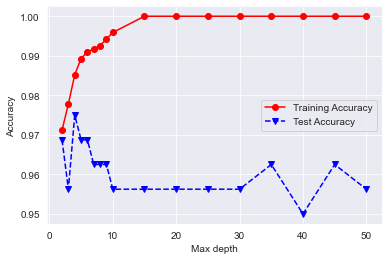

In [124]:
# Decision Tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_SMOTE, y_train_SMOTE)
    y_predTrain = clf.predict(X_train_SMOTE)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train_SMOTE, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');
print()
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

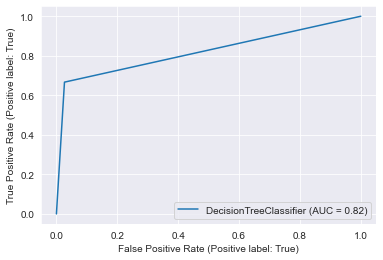

In [125]:
from sklearn.metrics import plot_roc_curve
clf = DecisionTreeClassifier()
clf.fit(X_train_SMOTE, y_train_SMOTE)
metrics.plot_roc_curve(clf, X_test, y_test);

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9375 , Difference =  6.25 %
K =  5 , Training Accuracy =  0.9827302631578947  Test Accuracy =  0.9375 , Difference =  4.523026315789469 %
K =  10 , Training Accuracy =  0.9712171052631579  Test Accuracy =  0.94375 , Difference =  2.7467105263157876 %
K =  15 , Training Accuracy =  0.9564144736842105  Test Accuracy =  0.925 , Difference =  3.1414473684210464 %
K =  20 , Training Accuracy =  0.9613486842105263  Test Accuracy =  0.925 , Difference =  3.6348684210526283 %
K =  25 , Training Accuracy =  0.959703947368421  Test Accuracy =  0.9125 , Difference =  4.720394736842104 %
K =  30 , Training Accuracy =  0.9613486842105263  Test Accuracy =  0.93125 , Difference =  3.0098684210526305 %

Classification Report
              precision    recall  f1-score   support

       False      1.000     0.960     0.980       151
        True      0.600     1.000     0.750         9

    accuracy                          0.963       160
   macro 

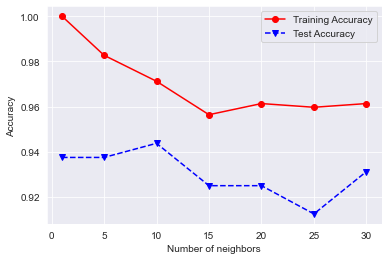

In [189]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_SMOTE, y_train_SMOTE)
    y_predTrain = clf.predict(X_train_SMOTE)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train_SMOTE, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');



index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

print()

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.93125 , Difference =  6.874999999999998 %
K =  5 , Training Accuracy =  0.9835526315789473  Test Accuracy =  0.9375 , Difference =  4.6052631578947345 %
K =  10 , Training Accuracy =  0.9703947368421053  Test Accuracy =  0.9375 , Difference =  3.289473684210531 %
K =  15 , Training Accuracy =  0.9555921052631579  Test Accuracy =  0.925 , Difference =  3.059210526315781 %
K =  20 , Training Accuracy =  0.962171052631579  Test Accuracy =  0.925 , Difference =  3.717105263157894 %
K =  25 , Training Accuracy =  0.9605263157894737  Test Accuracy =  0.9125 , Difference =  4.80263157894737 %
K =  30 , Training Accuracy =  0.9605263157894737  Test Accuracy =  0.9375 , Difference =  2.3026315789473673 %

Confusion Matrix for the Test Case
[[151   0]
 [  9   0]]

Classification Report
              precision    recall  f1-score   support

       False      0.944     1.000     0.971       151
        True      0.000     0.000     0.000       

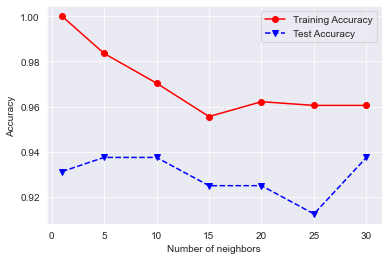

In [127]:
# KNN with Manhattan Distance Metric

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train_SMOTE, y_train_SMOTE)
    y_predTrain = clf.predict(X_train_SMOTE)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train_SMOTE, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))



plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');


index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

print()
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

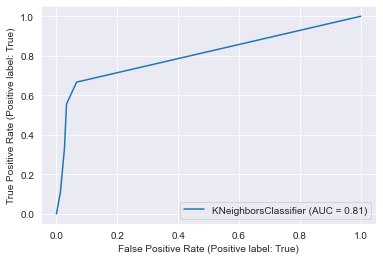

In [128]:
from sklearn.metrics import plot_roc_curve
clf = KNeighborsClassifier()
clf.fit(X_train_SMOTE, y_train_SMOTE)
metrics.plot_roc_curve(clf, X_test, y_test);

In [129]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train_SMOTE))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train_SMOTE))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Logistic Regression with no regularization
Train Accuracy:  0.9925986842105263
Test Accuracy:  0.95

Logistic Regression with L2 regularization
Train Accuracy:  0.984375
Test Accuracy:  0.96875
Classification Report
              precision    recall  f1-score   support

       False      0.987     0.980     0.983       151
        True      0.700     0.778     0.737         9

    accuracy                          0.969       160
   macro avg      0.843     0.879     0.860       160
weighted avg      0.971     0.969     0.970       160



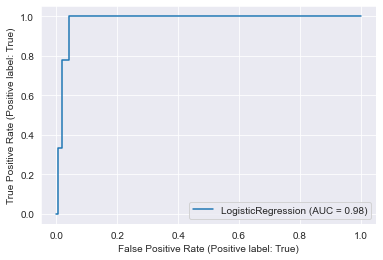

In [131]:
from sklearn.metrics import plot_roc_curve
clf = LogisticRegression()
clf.fit(X_train_SMOTE, y_train_SMOTE)
metrics.plot_roc_curve(clf, X_test, y_test);

In [132]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train_SMOTE))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Train Accuracy:  0.9572368421052632
Test Accuracy:  0.96875

Classification Report
              precision    recall  f1-score   support

       False      0.987     0.980     0.983       151
        True      0.700     0.778     0.737         9

    accuracy                          0.969       160
   macro avg      0.843     0.879     0.860       160
weighted avg      0.971     0.969     0.970       160



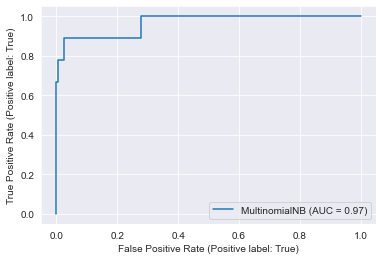

In [133]:
from sklearn.metrics import plot_roc_curve
clf = MultinomialNB()
clf.fit(X_train_SMOTE, y_train_SMOTE)
metrics.plot_roc_curve(clf, X_test, y_test);

In [186]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train_SMOTE))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
result=accuracy_score(y_pred_train, y_train_SMOTE)

print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))


Train Accuracy:  0.96875
Test Accuracy:  0.9625
0.96875
Classification Report
              precision    recall  f1-score   support

       False      1.000     0.960     0.980       151
        True      0.600     1.000     0.750         9

    accuracy                          0.963       160
   macro avg      0.800     0.980     0.865       160
weighted avg      0.978     0.963     0.967       160



In [135]:
# for the SVC classifier
# from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[145   6]
 [  0   9]]

Classification Report
              precision    recall  f1-score   support

       False      1.000     0.960     0.980       151
        True      0.600     1.000     0.750         9

    accuracy                          0.963       160
   macro avg      0.800     0.980     0.865       160
weighted avg      0.978     0.963     0.967       160



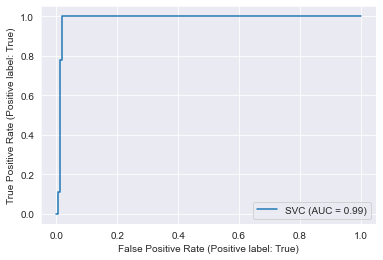

In [136]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 30)
clf.fit(X_train_SMOTE, y_train_SMOTE)
metrics.plot_roc_curve(clf, X_test, y_test);

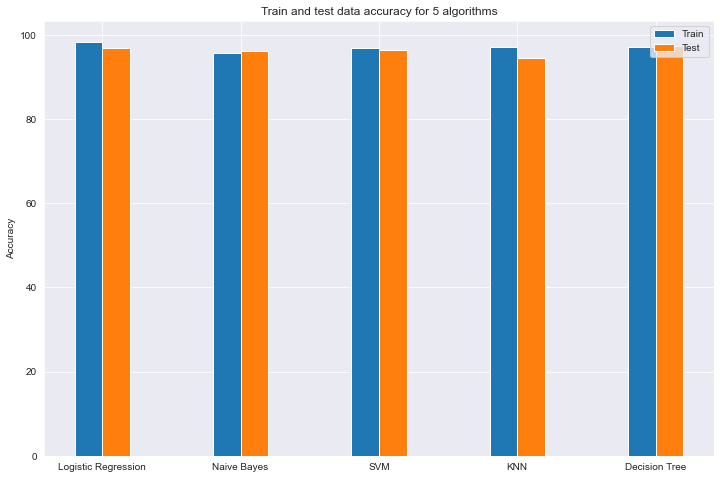

In [188]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree"]
train = [0.984*100, 0.957*100, 0.968*100, 0.971*100,0.971*100]
test = [0.969*100, 0.962*100, 0.963*100, 0.944*100,0.973*100]


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Train and test data accuracy for 5 algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



No handles with labels found to put in legend.


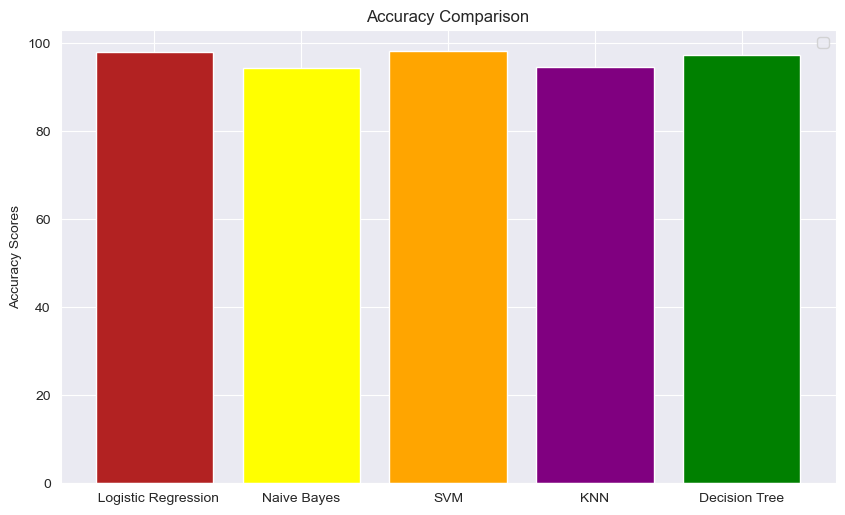

In [158]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
x1 = np.array([ "  Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree"])
y1 = np.array([0.979*100, 0.942*100, 0.980*100, 0.944*100,0.973*100])
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'yellow','orange','purple','green'])
plt.legend()
plt.show()


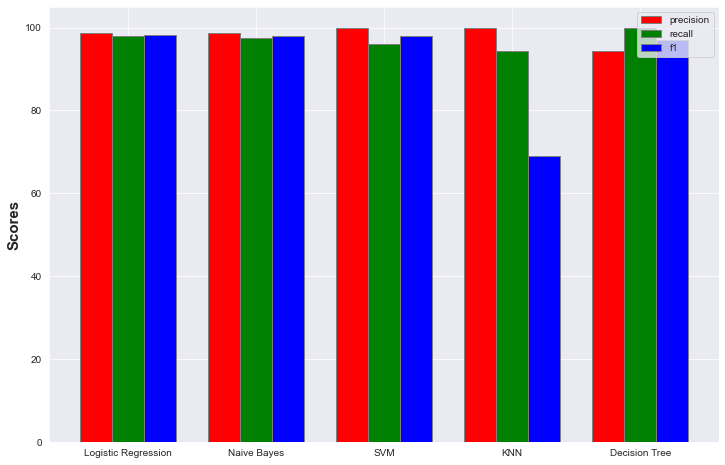

In [185]:

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
precision = [0.987*100, 0.986*100, 1*100, 1*100,0.944*100]
recall = [0.980*100, 0.974*100, 0.960*100, 0.943*100,1*100]
f1 = [0.983*100, 0.980*100, 0.980*100, 0.689*100,0.971*100]
 
# Set position of bar on X axis
br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, precision, color ='r', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br2, recall, color ='g', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br3, f1, color ='b', width = barWidth,
        edgecolor ='grey', label ='f1')
 
# Adding Xticks

plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(precision))],
        ["Logistic Regression","Naive Bayes", "SVM", "KNN", "Decision Tree"])
 
plt.legend()
plt.show()